# Zindi: Call Volume Prediction

Starting Code:
https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/
but it was a bit lmited to just predicting the next value
Next I used:
https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (12,13,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


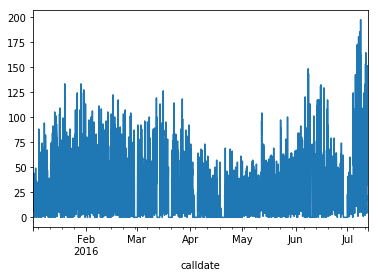

                    a   b
0 2016-01-01 07:00:00   8
1 2016-01-01 08:00:00  41
2 2016-01-01 09:00:00  20
3 2016-01-01 10:00:00  34
4 2016-01-01 11:00:00  44


In [3]:
from pandas import Series
from matplotlib import pyplot
calldata = Series.from_csv('train.csv', header=0)
calldata_per_hour=calldata.resample('h').count()
calldata_per_hour.plot()
pyplot.show()
calldata_per_hour = calldata_per_hour.to_frame().reset_index()
calldata_per_hour.columns = ['a', 'b']
print(calldata_per_hour.head())



In [2]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
 

# split dataset
X = difference(calldata_per_hour.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: Only the univariate case is implemented

In [ ]:
#lag
lag = X[-window_size:]
# save the last ob
last_ob=[calldata_per_hour.values[-1]]
print(coef)
print(lag)
print(last_ob)

In [ ]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)